<a href="https://colab.research.google.com/github/UDICatNCHU/PyTorch-SocialNetwork/blob/master/On_neural_networks_approximation_for_any_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
data = [[-1,-5], [-2,-5], [-3.5,-5], [1,5], [2.1,5], [3.3, 5], [2.3, 5]]

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [0]:
data = np.array(data)

In [0]:
x = data[:,0]
y = data[:,1]

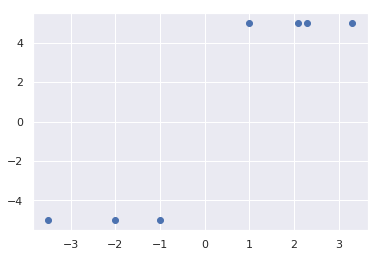

In [92]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

In [0]:
x_tensor = torch.tensor(x, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.float)

In [6]:
y_tensor.view(-1,1)

tensor([[-5.],
        [-5.],
        [-5.],
        [ 5.],
        [ 5.],
        [ 5.],
        [ 5.]])

In [0]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.layer1 = torch.nn.Linear(n_feature, size_hidden)   # hidden layer
        self.layer2 = torch.nn.Linear(size_hidden, n_output)   # output layer
#         self.predict = torch.nn.Linear(n_feature, n_output)   # output layer        


    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))      # activation function for hidden layer
#         x = self.layer1(x)      # without sigmoid      
        x = self.layer2(x)             # linear output

        return x


In [100]:
net = Net(1, 1, 1)
learning_rate = 0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss(reduction='sum')  # this is for regression mean squared loss

running_loss = 0.0
for epoch in range(1000):
  inputs = x_tensor.view(-1,1)
  labels = y_tensor.view(-1,1)
  optimizer.zero_grad()
  outputs = net(inputs)
  loss = criterion(outputs, labels)
  loss.backward()
  optimizer.step()  
  running_loss += loss.item()
  print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
  running_loss = 0.0
  

Epoch 1 loss:  179.1348876953125
Epoch 2 loss:  178.7306671142578
Epoch 3 loss:  178.33567810058594
Epoch 4 loss:  177.9501953125
Epoch 5 loss:  177.574462890625
Epoch 6 loss:  177.208740234375
Epoch 7 loss:  176.8532257080078
Epoch 8 loss:  176.50814819335938
Epoch 9 loss:  176.17367553710938
Epoch 10 loss:  175.8499755859375
Epoch 11 loss:  175.53720092773438
Epoch 12 loss:  175.23545837402344
Epoch 13 loss:  174.94482421875
Epoch 14 loss:  174.66539001464844
Epoch 15 loss:  174.3971405029297
Epoch 16 loss:  174.1400909423828
Epoch 17 loss:  173.8942108154297
Epoch 18 loss:  173.65940856933594
Epoch 19 loss:  173.435546875
Epoch 20 loss:  173.22251892089844
Epoch 21 loss:  173.0200958251953
Epoch 22 loss:  172.82803344726562
Epoch 23 loss:  172.64608764648438
Epoch 24 loss:  172.4739227294922
Epoch 25 loss:  172.31118774414062
Epoch 26 loss:  172.15750122070312
Epoch 27 loss:  172.01242065429688
Epoch 28 loss:  171.87545776367188
Epoch 29 loss:  171.7461395263672
Epoch 30 loss:  171.

In [89]:
net(torch.tensor([3.0]).view(-1,1))

tensor([[4.4759]], grad_fn=<AddmmBackward>)

In [90]:
p_x = [ i for i in range(-25,25)]
p_y = [ net(torch.tensor([y], dtype=torch.float).view(-1,1)).item() for y in p_x ]
p_y

[-4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162924766540527,
 -4.162919998168945,
 -4.162752151489258,
 -4.156876087188721,
 -3.955916166305542,
 -0.16800236701965332,
 4.198738098144531,
 4.467990875244141,
 4.475929260253906,
 4.476157188415527,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910461426,
 4.476162910

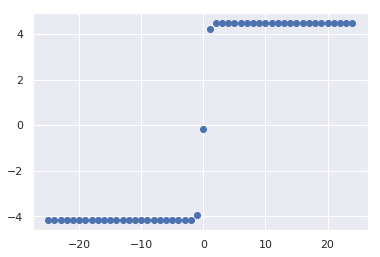

In [91]:
import matplotlib.pyplot as plt
plt.scatter(p_x, p_y)
plt.show()

In [0]:
data = [[-1,-50], [-2,-50], [-3,-50], [-4,-50], [1,50], [2,50], [3, 50], [4, 50], [5,50], [6, 100], [7, 100], [8, 100]]

In [0]:
data = [[-1,-5], [-2,-5], [-3,-5], [-4,-5], [1,5], [2,5], [3, 5], [4, 5], [5,5], [6, 10], [7, 10], [8, 10]]

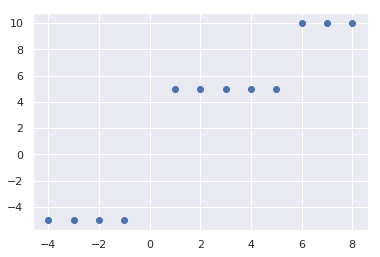

In [209]:

data = np.array(data)
x = data[:,0]
y = data[:,1]

x_tensor = torch.tensor(x, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.float)


import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

In [0]:
class Net2(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net2, self).__init__()
        self.layer1 = torch.nn.Linear(n_feature, size_hidden)   # hidden layer
        self.layer2 = torch.nn.Linear(size_hidden, n_output)   # output layer
#         self.predict = torch.nn.Linear(n_feature, n_output)   # output layer        


    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))      # activation function for hidden layer
#         x = self.layer1(x)      # without sigmoid      
        x = self.layer2(x)             # linear output

        return x
net2 = Net2(1, 2, 1)

In [211]:
learning_rate = 0.1
optimizer = torch.optim.Adam(net2.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss(reduction='sum')  # this is for regression mean squared loss

running_loss = 0.0
for epoch in range(10000):
  inputs = x_tensor.view(-1,1)
  labels = y_tensor.view(-1,1)
  optimizer.zero_grad()
  outputs = net2(inputs)
  loss = criterion(outputs, labels)
  loss.backward()
  optimizer.step()  
  running_loss += loss.item()
#   print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
  running_loss = 0.0
print(loss.item())

0.001309102401137352


In [214]:
net2(torch.tensor([200.0]).view(-1,1))

tensor([[10.0112]], grad_fn=<AddmmBackward>)

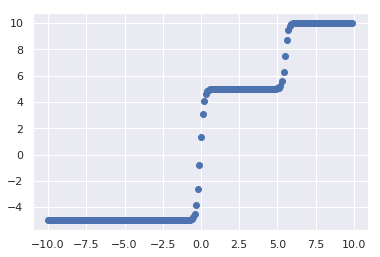

In [213]:
p_x = [ i for i in np.arange(-10,10, 0.1)]
p_y = [ net2(torch.tensor([y], dtype=torch.float).view(-1,1)).item() for y in p_x ]
import matplotlib.pyplot as plt
plt.scatter(p_x, p_y)
plt.show()

In [0]:
z = y*y

In [0]:
z

tensor([64.], grad_fn=<MulBackward0>)

In [0]:
z.backward()

In [0]:
x.grad

tensor([192.])

In [0]:
x.grad

tensor([192.])

In [0]:
x = torch.tensor([1,2,3,4,5], dtype=torch.float, requires_grad=True)

In [0]:
parameters = torch.tensor([1,1,1,1,1], dtype=torch.float, requires_grad=True)

In [0]:
result = (x*parameters).sum()

In [0]:
result

tensor(15., grad_fn=<SumBackward0>)

In [0]:
error = torch.zeros_like(result)

In [0]:
error = torch.abs(result - error)

In [0]:
error

tensor(15., grad_fn=<AbsBackward>)

In [0]:
error.backward()

In [0]:
parameters.grad

tensor([1., 2., 3., 4., 5.])

In [0]:
(x*parameters).sum()

tensor(14.4500, grad_fn=<SumBackward0>)

In [0]:
x = x.view(1,-1).clone().detach()

In [0]:
x.requires_grad_(True)

tensor([[1., 2., 3., 4., 5.]], requires_grad=True)

tensor([[1., 2., 3., 4., 5.]], requires_grad=True)

In [0]:
parameters = parameters.view(-1,1)

In [0]:
parameters.requires_grad_= True

In [0]:
x

tensor([[1., 2., 3., 4., 5.]], grad_fn=<ViewBackward>)

In [0]:
result = torch.mm(x, parameters)

In [0]:
x

tensor([[1., 2., 3., 4., 5.]], grad_fn=<ViewBackward>)

In [0]:
y = x.pow(2).sum()

In [0]:
y

tensor(55., grad_fn=<SumBackward0>)

In [0]:
y.backward()

In [0]:
print(x.grad)

tensor([[ 2.,  4.,  6.,  8., 10.]])


In [0]:
xx = torch.tensor([[1., -1.]], requires_grad=True)
out = xx.pow(2).sum()
out.backward()
xx.grad

tensor([[ 2., -2.]])